## Analisis del nacimiento de bebes en US

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
sns.set()

In [4]:
births = pd.read_csv(r"base de datos\us-births.csv")
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [5]:
births.tail()

,year,month,day,gender,births
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215
15546,2008,12,NaN,M,181235


In [6]:
births.shape

(15547, 5)

In [7]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [8]:
births.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [9]:
births.pivot_table('births', index="year", columns= "gender", aggfunc= "sum")

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023
1974,1543005,1627626
1975,1535546,1618010
1976,1547613,1628863
1977,1623363,1708796


In [10]:
births["decade"] = ((births['year']//10)*10).astype(str)+"s" #obtenemos los datos de decada
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960s
1,1969,1,1.0,M,4440,1960s
2,1969,1,2.0,F,4454,1960s
3,1969,1,2.0,M,4548,1960s
4,1969,1,3.0,F,4548,1960s


In [11]:
births.pivot_table('births', index = 'decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960s,1753634,1846572
1970s,16263075,17121550
1980s,18310351,19243452
1990s,19479454,20420553
2000s,18229309,19106428


<Figure size 1500x800 with 0 Axes>

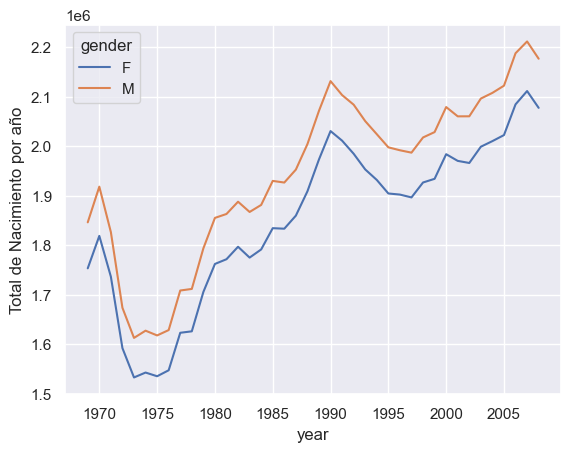

In [12]:
plt.figure(figsize=(15,8))
births.pivot_table('births',index = 'year', columns= 'gender', aggfunc= 'sum').plot()
plt.ylabel("Total de Nacimiento por año")
plt.show()

In [13]:
# limpiardo valores outliers

quartiles = np.percentile(births['births'], [25,50,75])
quartiles

array([4358. , 4814. , 5289.5])

In [14]:
med = quartiles[1] # mediana
IQR = quartiles[2] - quartiles[0]
sig = 0.75*IQR #estimacion de desviacion standard

births = births.query("(births > @med - 5*@sig) & (births < @med + 5*@sig)")
births.shape

(14610, 6)

In [15]:
births['day'] = births['day'].astype(int)
births.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960s
1,1969,1,1,M,4440,1960s
2,1969,1,2,F,4454,1960s
3,1969,1,2,M,4548,1960s
4,1969,1,3,F,4548,1960s


In [16]:
births.index = pd.to_datetime(10000*births.year + 100*births.month + births.day, format="%Y%m%d")
births.head()

,year,month,day,gender,births,decade
1969-01-01,1969,1,1,F,4046,1960s
1969-01-01,1969,1,1,M,4440,1960s
1969-01-02,1969,1,2,F,4454,1960s
1969-01-02,1969,1,2,M,4548,1960s
1969-01-03,1969,1,3,F,4548,1960s


In [17]:
births['dayofweek'] = births.index.dayofweek # calculando el dia de la semana
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960s,2
1969-01-01,1969,1,1,M,4440,1960s,2
1969-01-02,1969,1,2,F,4454,1960s,3
1969-01-02,1969,1,2,M,4548,1960s,3
1969-01-03,1969,1,3,F,4548,1960s,4


In [18]:
births.pivot_table('births', index = 'dayofweek', columns='decade', aggfunc='mean')

decade,1960s,1970s,1980s
dayofweek,,,
0,5063.826923,4689.097701,5276.907249
1,5286.096154,4885.252399,5503.842553
2,5074.622642,4750.376200,5367.642553
3,4978.288462,4696.923372,5333.485106
4,5107.884615,4782.095785,5393.087234
5,4651.057692,4207.784483,4483.901064
6,4342.346154,3979.278736,4308.120469


C:\Users\dg_su\AppData\Local\Temp\ipykernel_8076\3188895743.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([ 'Lun', 'Mar', 'Mie', 'Jue', 'Vie', 'Sab', 'Dom'])


Text(0, 0.5, 'Media de nacimientos por día')

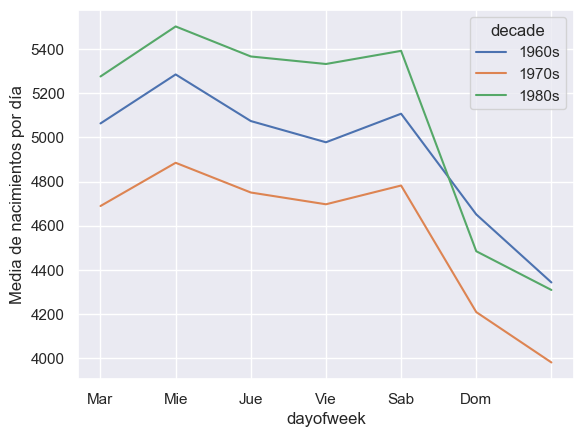

In [19]:
births.pivot_table('births', index = 'dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels([ 'Lun', 'Mar', 'Mie', 'Jue', 'Vie', 'Sab', 'Dom'])
plt.ylabel("Media de nacimientos por día")

In [20]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day], aggfunc= "mean")
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [31]:
births_by_date.index = pd.to_datetime(['2020-{:02d}-{:02d}'.format(month, day) for (month, day) in births_by_date.index])
births_by_date.head()

<Figure size 1200x900 with 0 Axes>

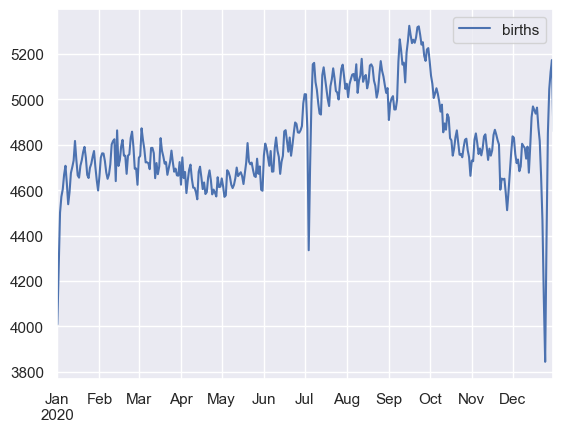

In [37]:
plt.figure(figsize=(12,9))
births_by_date.plot()
plt.show()